In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [4]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


<AxesSubplot:>

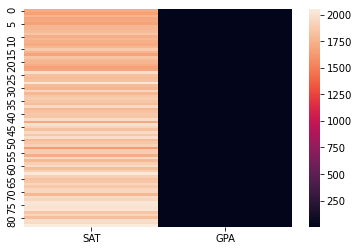

In [14]:
sns.heatmap(data)

In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Exploring the problem with this **Linear regression** example

So, we have a sample of 84 students, who have studied in college.Their total SAT scores include critical reading, mathematics, and writing. Whereas, the GPA is their Grade Point Average they had at graduation.

When you think about it, it totally makes sense.

- You sit the SAT and get a score.
- With this score, you apply to college.
- The next 4 years, you attend college and graduate receiving many grades, forming your GPA

Why would we predict GPA with SAT? Well, the SAT is considered one of the best estimators of intellectual capacity and capability.
On average, if you did well on your SAT, you will do well in college and at the workplace. Furthermore, almost all colleges across the USA are using the SAT as a proxy for admission.
And last but not least, the SAT stood the test of time and established itself as the leading exam for college admission

**It is safe to say our regression makes sense.**

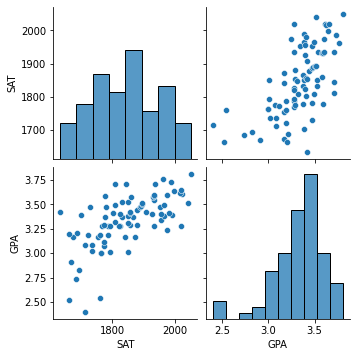

In [7]:
sns.pairplot(data)

In [8]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [10]:
mask = np.tril(data.corr())
mask

array([[1.        , 0.        ],
       [0.63718436, 1.        ]])

<AxesSubplot:>

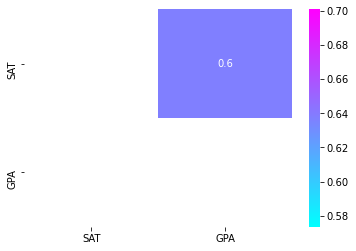

In [11]:
sns.heatmap(data.corr(), fmt='.1g',annot=True, cmap= 'cool', mask=mask)

## Selecting Feature and Label variables

Next, we divide the variables into two sets: dependent (or target variable “y”) and independents (or feature variables “X”)

In [12]:
X = data['SAT']
y = data['GPA']

plotting the data in order to understand it better and see if there is a relationship to be found.

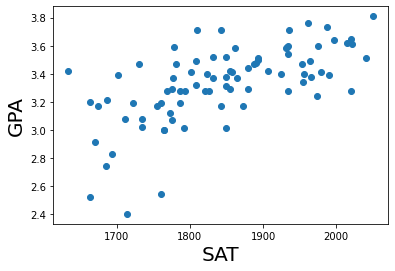

In [16]:
plt.scatter(X,y) 
plt.xlabel('SAT', fontsize = 20) 
plt.ylabel('GPA', fontsize = 20) 
plt.show()

In [18]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           7.20e-11
Time:                        09:38:04   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plotting the regression line

We can see the coefficient of the intercept, or the constant as they’ve named it in our case. Both terms are used interchangeably. In any case, it is 0.275, which means b0 is 0.275.

Notice the other coefficient is 0.0017. This is our b1. These are the only two numbers we need to define the regression equation


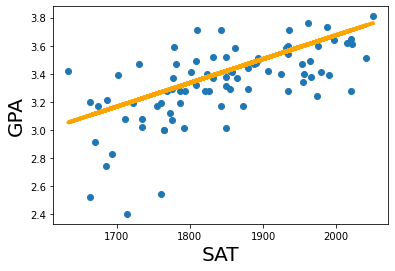

In [23]:
#Plotting the line of best fit
plt.scatter(X,y)
#y = mx + c
yhat = 0.0017*X + 0.275
 
fig = plt.plot(X,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('SAT', fontsize = 20)
 
plt.ylabel('GPA', fontsize = 20)
 
plt.show()